In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy import stats

# Problem Context
Pada project kali ini saya ingin menganalisa sistem pembuatan sampah di Austin Smart City.
Dataset yang saya gunakan diambil dari `Google Cloud Platform.`

# query yang telah dibuat di Google Cloud Platform
```
SELECT load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion`
LIMIT 150000;
```

# Import Dataset

In [2]:
df = pd.read_csv('austin_waste.csv', parse_dates=["load_time"])
df

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00+00:00,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00+00:00,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00+00:00,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00+00:00,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00+00:00,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
149995,2011-08-17 12:45:00+00:00,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00+00:00,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00+00:00,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00+00:00,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF


## Menampilkan head

In [3]:
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00+00:00,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00+00:00,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00+00:00,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00+00:00,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00+00:00,RECYCLING - COMINGLE,1700.0,MRF


`Pada tahap awal ini saya menampilkan 5 baris pertama pada dataset.`

## Menampilkan tail

In [4]:
df.tail()

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00+00:00,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00+00:00,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00+00:00,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00+00:00,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00+00:00,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


`Pada tahap awal ini saya menampilkan 5 baris paling bawah pada dataset.`

## Cleaning Dataset

In [5]:
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00+00:00,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00+00:00,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00+00:00,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00+00:00,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00+00:00,RECYCLING - COMINGLE,1700.0,MRF


`Pada tahap awal ini saya menampilkan 5 baris pertama pada dataset agar dapat melihat permasalah yang ada di dalam dataset secara lebih luas.`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     150000 non-null  datetime64[ns, UTC]
 1   load_type     150000 non-null  object             
 2   load_weight   144934 non-null  float64            
 3   dropoff_site  150000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 4.6+ MB


`Di sini saya menampilkan informasi apa saja yang terdapat di dalam datasetnya.`

## Melihat dan menghandling missing value pada masing-masing site

In [7]:
df.dropoff_site.unique()

array(['MRF', 'ELMONT', 'KRAMER', 'WILCAB', 'ZILKER', 'CLARKSON',
       'PARK BEND', 'TDS - MRF'], dtype=object)

`Di sini saya menampilkan nilai unique yang terdapat pada kolom 'dropoff_site' untuk mengetahui ada site apa saja di dalam datasetnya.`

### Missing value pada site `MRF`

In [8]:
len(df[df.dropoff_site == 'MRF'])

89625

`Bisa dilihat, ternyata tempat pembuangan sampah yang bernama MRF itu ada 89625.`

In [9]:
df[df.dropoff_site == 'MRF'].isnull().sum()

load_time        0
load_type        0
load_weight     22
dropoff_site     0
dtype: int64

In [10]:
#persentase missing value ketika kolom dropoff_site bernilai MRF

22/89625

0.00024546722454672244

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai MRF itu ada 22 dan persentase missing valuenya sekitar 0.02% yang mana sangat kecil. Hal ini berarti nilai MRF tidak masalah untuk digunakan dan nilai missing value dari kolom 'load_weight' ketika 'dropoff = 'MRF' nanti bisa diisi dengan nilai lain.`

### Missing value pada site `ELMONT`

In [11]:
len(df[df.dropoff_site == 'ELMONT'])

1462

`Bisa dilihat, ternyata tempat pembuangan sampah yang bernama ELMONT itu ada 1462`

In [12]:
df[df.dropoff_site == 'ELMONT'].isnull().sum()

load_time          0
load_type          0
load_weight     1457
dropoff_site       0
dtype: int64

In [13]:
#persentase missing value ketika kolom dropoff_site bernilai ELMONT

(1457/1462)*100

99.65800273597812

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai ELMONT itu ada 1457 yang mana persentase missing valuenya sekitar 99% sehingga hal ini tidak baik digunakan jika suatu variable memiliki missing value terlalu banyak. Untuk itu, saya akan mengeliminasi nilai ELMONT pada kolom dropoff_site`

In [14]:
df.drop(df[df.dropoff_site == 'ELMONT'].index, inplace=True)

### Missing value pada site `KRAMER`

In [15]:
len(df[df.dropoff_site == 'KRAMER'])

316

`Bisa dilihat, ternyata tempat pembuangan sampah yang bernama KRAMER itu ada 316.`

In [16]:
df[df.dropoff_site == 'KRAMER'].isnull().sum()

load_time         0
load_type         0
load_weight     313
dropoff_site      0
dtype: int64

In [17]:
#persentase missing value ketika kolom dropoff_site bernilai KRAMER

(313/316)*100

99.0506329113924

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai KRAMER itu ada 313 yang mana persentase missing valuenya sekitar 99% sehingga hal ini tidak baik digunakan jika suatu variable memiliki missing value terlalu banyak. Untuk itu, saya akan mengeliminasi nilai KRAMER pada kolom dropp_off`

In [18]:
df.drop(df[df.dropoff_site == 'KRAMER'].index, inplace=True)

### Missing value pada site `WILCAB`

In [19]:
len(df[df.dropoff_site == 'WILCAB'])

2754

`Bisa dilihat, ternyata tempat pembuangan sampah yang bernama WILCAB itu ada 2754.`

In [20]:
df[df.dropoff_site == 'WILCAB'].isnull().sum()

load_time          0
load_type          0
load_weight     2745
dropoff_site       0
dtype: int64

In [21]:
#persentase missing value ketika kolom dropoff_site bernilai WILCAB

(2745/2754)*100

99.67320261437908

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai WILCAB itu ada 2745 yang mana persentase missing valuenya sekitar 99% sehingga hal ini tidak baik digunakan jika suatu variable memiliki missing value terlalu banyak. Untuk itu, saya akan mengeliminasi nilai WILCAB pada kolom dropp_off`

In [22]:
df.drop(df[df.dropoff_site == 'WILCAB'].index, inplace=True)

### Missing value pada site `ZILKER`

In [23]:
len(df[df.dropoff_site == 'ZILKER'])

1024

`Terdapat 1024 data pada site 'ZILKER'`

In [24]:
df[df.dropoff_site == 'ZILKER'].isnull().sum()

load_time         0
load_type         0
load_weight     115
dropoff_site      0
dtype: int64

`Terdapat 115 missing value pada 'load_weight' yang ada di site 'ZILKER'`

```

```

In [25]:
#persentase missing value ketika kolom dropoff_site bernilai ZILKER

(115/1024)*100

11.23046875

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai ZILKER itu ada 115 dan persentase missing valuenya sekitar 011.23% yang mana sangat kecil. Hal ini berarti nilai ZILKER tidak masalah untuk digunakan dan nilai missing value dari kolom 'load_weight' ketika 'dropoff_site = 'ZILKER' nanti bisa diisi dengan nilai lain.`

### Missing value pada site `CLARKSON`

In [26]:
len(df[df.dropoff_site == 'CLARKSON'])

386

`Terdapat 386 data pada site 'CLARKSON'`

In [27]:
df[df.dropoff_site == 'CLARKSON'].isnull().sum()

load_time         0
load_type         0
load_weight     385
dropoff_site      0
dtype: int64

`Terdapat 385 missing value pada 'load_weight' yang ada di site 'CLARKSON'`

In [28]:
#persentase missing value ketika kolom dropoff_site bernilai CLARKSON

(385/386)*100

99.74093264248705

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai CLARKSON itu ada 313 yang mana persentase missing valuenya sekitar 99% sehingga hal ini tidak baik digunakan jika suatu variable memiliki missing value terlalu banyak. Untuk itu, saya akan mengeliminasi nilai CLARKSON pada kolom dropp_off`

In [29]:
df.drop(df[df.dropoff_site == 'CLARKSON'].index, inplace=True)

### Missing value pada site `PARK BEND`

In [30]:
len(df[df.dropoff_site == 'PARK BEND'])

396

`Terdapat 396 data pada site 'PARK BEND'`

In [31]:
df[df.dropoff_site == 'PARK BEND'].isnull().sum()

load_time        0
load_type        0
load_weight     10
dropoff_site     0
dtype: int64

`Terdapat 10 missing value pada 'load_weight' yang ada di site 'PARK BEND'`

In [32]:
#persentase missing value ketika kolom dropoff_site bernilai PARK BEND

(10/396)*100

2.525252525252525

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai PARK BEND itu ada 10 dan persentase missing valuenya sekitar 2.52% yang mana sangat kecil. Hal ini berarti nilai PARK BEND tidak masalah untuk digunakan dan nilai missing value dari kolom 'load_weight' ketika 'dropoff_site = 'PARK BEND' nanti bisa diisi dengan nilai lain.`

### Missing value pada site `TDS - MRF`

In [33]:
len(df[df.dropoff_site == 'TDS - MRF'])

54037

In [34]:
df[df.dropoff_site == 'TDS - MRF'].isnull().sum()

load_time        0
load_type        0
load_weight     19
dropoff_site     0
dtype: int64

In [35]:
#persentase missing value ketika kolom dropoff_site bernilai TDS - MRF

(19/54037)*100

0.03516109332494402

`Ternyata, nilai missing value pada kolom load_weight ketika kolom dropoff bernilai TDS - MRF itu ada 19 dan persentase missing valuenya sekitar 0.03% yang mana sangat kecil. Hal ini berarti nilai TDS - MRF tidak masalah untuk digunakan dan nilai missing value dari kolom 'load_weight' ketika 'dropoff_site = 'TDS - MRF' nanti bisa diisi dengan nilai lain.`

## Handling Missing Value

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145082 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     145082 non-null  datetime64[ns, UTC]
 1   load_type     145082 non-null  object             
 2   load_weight   144916 non-null  float64            
 3   dropoff_site  145082 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.5+ MB


`Berdasarkan informasi dari dataset yang ada, ternyata terdapat missing value pada kolom 'load_weight'. Untuk itu, sebelum melakukan analisis lebih lanjut, saya akan mengatasi missing value tersebut.`

In [37]:
df.groupby('dropoff_site')['load_weight'].median()

dropoff_site
MRF           4260.0
PARK BEND     5500.0
TDS - MRF    10960.0
ZILKER        8750.0
Name: load_weight, dtype: float64

`Di sini saya mencari nilai median pada masing-masing site yang ada untuk digunakan dalam menghandle missing value. Alasan menggunakan nilai median supaya nilainya tidak terganggu oleh outlier.`

### MRF

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145082 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     145082 non-null  datetime64[ns, UTC]
 1   load_type     145082 non-null  object             
 2   load_weight   144916 non-null  float64            
 3   dropoff_site  145082 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.5+ MB


In [39]:
a = df[df.dropoff_site == 'MRF'].fillna(4260.0)
df[df.dropoff_site == 'MRF'] = a

`Pada tahap ini saya mengisi nilai missing value dengan nilai median saat dropoff_site == 'MRF' ke dalam dataframe.`

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145082 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     145082 non-null  datetime64[ns, UTC]
 1   load_type     145082 non-null  object             
 2   load_weight   144938 non-null  float64            
 3   dropoff_site  145082 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.5+ MB


`Informasi di atas menjelaskan kalau ternyata nilai untuk mengisi missing value berhasil dimasukkan dengan tanda bertambahnya nilai 'non-null' pada kolom load_weight.`

### PARK BEND 

In [41]:
b = df[df.dropoff_site == 'PARK BEND'].fillna(5500.00)
df[df.dropoff_site == 'PARK BEND'] = b

`Pada tahap ini saya mengisi nilai missing value dengan nilai median saat dropoff_site == 'PARK BEND' ke dalam dataframe.`

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145082 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     145082 non-null  datetime64[ns, UTC]
 1   load_type     145082 non-null  object             
 2   load_weight   144948 non-null  float64            
 3   dropoff_site  145082 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.5+ MB


`Informasi di atas menjelaskan kalau ternyata nilai untuk mengisi missing value berhasil dimasukkan dengan tanda bertambahnya nilai 'non-null' pada kolom load_weight.`

### TDS - MRF

In [43]:
c = df[df.dropoff_site == 'TDS - MRF'].fillna(10960.0)
df[df.dropoff_site == 'TDS - MRF'] = c

`Pada tahap ini saya mengisi nilai missing value dengan nilai median saat dropoff_site == 'TDS - MRF' ke dalam dataframe.`

In [44]:
df[df.dropoff_site == 'TDS - MRF'] 

,load_time,load_type,load_weight,dropoff_site
95963,2014-08-29 11:00:00+00:00,RECYCLING - SINGLE STREAM,5760.0,TDS - MRF
95964,2011-10-28 01:12:00+00:00,RECYCLING - SINGLE STREAM,5560.0,TDS - MRF
95965,2012-04-06 02:23:00+00:00,RECYCLING - SINGLE STREAM,16500.0,TDS - MRF
95966,2011-07-08 01:50:00+00:00,RECYCLING - SINGLE STREAM,2640.0,TDS - MRF
95967,2011-01-14 12:54:00+00:00,RECYCLING - SINGLE STREAM,5480.0,TDS - MRF
...,...,...,...,...
149995,2011-08-17 12:45:00+00:00,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00+00:00,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00+00:00,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00+00:00,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF


`Informasi di atas menjelaskan kalau ternyata nilai untuk mengisi missing value berhasil dimasukkan dengan tanda bertambahnya nilai 'non-null' pada kolom load_weight.`

### ZILKER

In [45]:
d = df[df.dropoff_site == 'ZILKER'].fillna(8750.0)
df[df.dropoff_site == 'ZILKER'] = d

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145082 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     145082 non-null  datetime64[ns, UTC]
 1   load_type     145082 non-null  object             
 2   load_weight   145082 non-null  float64            
 3   dropoff_site  145082 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.5+ MB


`Informasi di atas menjelaskan kalau ternyata nilai untuk mengisi missing value berhasil dimasukkan dengan tanda bertambahnya nilai 'non-null' pada kolom load_weight.`

## 2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

- Melihat rentang waktu pengambilan data
- Ada apa saja tipe load sampah di kota Austin berdasarkan data
- Mengetahui tempat pembuangan sampah ada dimana saja
- dsb.

### Rata-rata sampah dalam 10 tahun terkahir

In [47]:
year = df.load_time.dt
list_year = df['load_time'] = year.year
df.replace(df.load_time, list_year, inplace=True)

`Di sini saya hanya mengakses data tahun pada kolom 'load_time' supaya lebih mudah untuk menganalisis datanya.`

In [48]:
df.groupby('load_time')['load_weight'].mean().sort_values(ascending = False).head(10)

load_time
2014    10205.843366
2013    10133.705896
2012    10118.769682
2015    10018.219924
2016     9983.111411
2011     9978.133883
2017     9920.842325
2018     9755.972945
2020     9674.997045
2019     9459.229307
Name: load_weight, dtype: float64

`Bisa dilihat, tahun 2014 merupakan tahun yang memiliki rata-rata sampah paling banyak, disusul oleh tahun 2013, dan tahun 2019 merupakan tahun memiliki rata-rata sampah paling sedikit.`

### Ada apa saja tipe load sampah di kota Austin berdasarkan data

In [49]:
df.groupby('load_type')['load_weight'].mean()

load_type
BRUSH                           5118.453125
BULK                            5634.761905
CONTAMINATED RECYCLING          6980.000000
DEAD ANIMAL                      312.903226
GARBAGE COLLECTIONS            16900.864929
LITTER                          2313.333333
MIXED LITTER                    4963.636364
MULCH                           9370.000000
ORGANICS                       11831.428571
RECYCLED METAL                  9254.750000
RECYCLING - COMINGLE            3250.484565
RECYCLING - PAPER               4407.458305
RECYCLING - PLASTIC BAGS         170.000000
RECYCLING - SINGLE STREAM       9760.089155
SWEEPING                        8583.076923
TIRES                           2022.321404
YARD TRIMMING                  12932.559758
YARD TRIMMING - X-MAS TREES     7500.000000
Name: load_weight, dtype: float64

`Hasil di atas menampilkan tipe-tipe sampah yang ada di kota austin dan juga rata-rata dari berat sampahnya`

### Mengetahui tempat pembuangan sampah ada dimana saja

In [50]:
df.groupby('dropoff_site')['load_weight'].mean()

dropoff_site
MRF           5304.763816
PARK BEND     7466.691919
TDS - MRF    10118.503747
ZILKER        9647.423828
Name: load_weight, dtype: float64

`Hasil di atas menampilkan tempat pembuangan sampah yang ada di kota austin dan juga rata-rata dari berat sampahnya`

## 3. Insight based on Central Tendency (mean, median, and modus)

In [51]:
df.groupby('dropoff_site').agg({'load_weight':['mean', 'median']})

load_weight         
                      mean   median
dropoff_site                       
MRF            5304.763816   4260.0
PARK BEND      7466.691919   5500.0
TDS - MRF     10118.503747  10960.0
ZILKER         9647.423828   8750.0

In [52]:
df.groupby('dropoff_site').agg({'load_weight': pd.Series.mode})

,load_weight
dropoff_site,
MRF,3460.0
PARK BEND,5500.0
TDS - MRF,12300.0
ZILKER,15000.0


```
Berdasarkan hasil dari central tendency pada masing-masing site yang ada, ternyata masing-masing site memiliki nilai rata-rata, modus, dan median yang berbeda-beda.

Perbedaan nilai rata-rata bobot sampah pada masing-masing site terhadap mediannya menjelaskan kalau ternyata nilainya tidak terlalu jauh. Hal ini berarti jumlah sebaran bobot sampah yang terdapat pada masing-masing site ini memiliki kemungkinan bahwa terdistribusi normal, ataupun jika tidak normal, mungkin nilai skewnessnya tidak terlalu besar.
```

## Interest Site
```
Pada tahap ini saya tertarik untuk menganalisis sistem pembuangan dan pengelolaan sampah di site `TDS - MRF` karena memiliki rata-rata sampah yang paling banyak dibandingkan yang lainnya. Dan juga, selisih nilai rata-rata site `TDS-MRF` terhadap mediannya merupakan selisih yang paling kecil dibandingkan dengan yang lainnya.
```

## Outlier Checking

In [53]:
import seaborn as sns

In [54]:
site_interest = df[df.dropoff_site == 'TDS - MRF']
site_interest.head()

,load_time,load_type,load_weight,dropoff_site
95963,2014,RECYCLING - SINGLE STREAM,5760.0,TDS - MRF
95964,2011,RECYCLING - SINGLE STREAM,5560.0,TDS - MRF
95965,2012,RECYCLING - SINGLE STREAM,16500.0,TDS - MRF
95966,2011,RECYCLING - SINGLE STREAM,2640.0,TDS - MRF
95967,2011,RECYCLING - SINGLE STREAM,5480.0,TDS - MRF


```
Pada tahap ini saya hanya mengakses site 'TDS - MRF' untuk dilakukan analisis lebih lenjut terhadap outliernnya.
```

### Extreme Value Analysis

<AxesSubplot:xlabel='dropoff_site', ylabel='load_weight'>

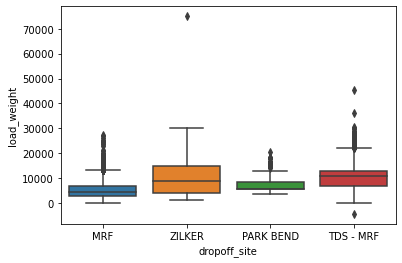

In [55]:
sns.boxplot(data = df, y = 'load_weight', x = 'dropoff_site')

In [56]:
site_interest.load_weight.skew()

-0.03650835934393152

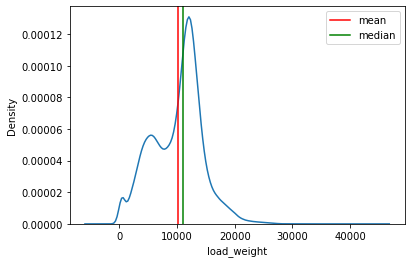

In [57]:
sns.kdeplot(site_interest['load_weight'])
plt.axvline(site_interest['load_weight'].mean(), color='r', label='mean') 
plt.axvline(site_interest['load_weight'].median(), color='g', label='median') 
plt.legend()

`Karena nilai dari skewness yang didapatkan sebesar -0.0365, maka saya akan menggunakan angka 1.5 sebagai pengali pada perhitungan Extreme Value Analysis Tukey untuk mengatasi nilai outlier. Bisa dilihat, hasilnya itu menandakan skew positif yang mana ekornya ke kanan. Hal ini berarti datanya lebih tertarik ke kanan atau lebih besar daripada nilai median.`

In [58]:
# EVA untuk data yang tidak terdistribusi normal (IQR)
site_interest.load_weight.quantile([.25, .5, .75])

0.25     6700.0
0.50    10960.0
0.75    12900.0
Name: load_weight, dtype: float64

In [59]:
Q3 = site_interest.load_weight.quantile(.75)
Q1 = site_interest.load_weight.quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

### Batas atas

In [60]:
upper

22200.0

`Batas atas dari hasil Extreme Value Analysis sebesar 22200.0`

### Batas bawah

In [61]:
lower

-2600.0

`Batas bawah dari hasil Extreme Value Analysis sebesar -2600.0`

In [62]:
site_interest_clean = site_interest[(site_interest['load_weight'] <= upper)&
                      (site_interest['load_weight'] > 0)]

site_interest_clean.head()

,load_time,load_type,load_weight,dropoff_site
95963,2014,RECYCLING - SINGLE STREAM,5760.0,TDS - MRF
95964,2011,RECYCLING - SINGLE STREAM,5560.0,TDS - MRF
95965,2012,RECYCLING - SINGLE STREAM,16500.0,TDS - MRF
95966,2011,RECYCLING - SINGLE STREAM,2640.0,TDS - MRF
95967,2011,RECYCLING - SINGLE STREAM,5480.0,TDS - MRF


### Peresentase outlier

In [63]:
#MELIHAT PERSENTASE OUTLIER

((site_interest.shape[0] - site_interest_clean.shape[0]) / site_interest.shape[0]) * 100

0.5459222384662361

`Hasil persetase dari perbedaan outlier ini hanya sebesar 0.54% yang mana berarti tidak signifikan dengan asumsi dikatakan signifikan jika persentase perbedaannya >50%`

### Central Tendency site TDS - MRF dengan Outlier

In [64]:
site_interest.groupby('dropoff_site').agg({'load_weight':['mean', 'median']})

load_weight         
                      mean   median
dropoff_site                       
TDS - MRF     10118.503747  10960.0

In [65]:
site_interest.groupby('dropoff_site').agg({'load_weight': pd.Series.mode})

,load_weight
dropoff_site,
TDS - MRF,12300.0


### Central Tendency site TDS - MRF tanpa Outlier

In [66]:
site_interest_clean.groupby('dropoff_site').agg({'load_weight':['mean', 'median']})

load_weight         
                      mean   median
dropoff_site                       
TDS - MRF     10044.664173  10940.0

In [67]:
site_interest_clean.groupby('dropoff_site').agg({'load_weight': pd.Series.mode})

,load_weight
dropoff_site,
TDS - MRF,12300.0


`Bisa dilihat perbedan yang didapatkan sebesar:`

**Dengan outlier**<br>
mean: 10118.503747 <Br>
median: 10960.0 <Br>
modus: 12300.0

**Tanpa Outlier** <br>
mean: 10044.664173 <Br>
median: 10940.0 <br>
modus: 12300.0
    
`Perbandingan hasil 'Central Tendency' terhadap site 'TDS - MRF' ketika masih terdapat outlier dengan yang tidak dapat dikatakan tidak ada perbedaan yang signifikan dari jumlah mean dan rata-ratanya. Dan juga, nilai modus yang di dapatkan ketika masih terdapat outlier dan yang tidak terdapat outlier ternyata sama.`

## 6. Range, Variance, and Standard Deviation

Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

### Range

In [68]:
site_interest_clean.load_weight.max() - site_interest_clean.load_weight.min()

22180.0

`Di dapatkan nilai range dari load_weight sebesar 22180.0 pada site TDS - MRF`

### Variance

In [69]:
site_interest_clean.load_weight.var()

18342021.89786147

`Di dapatkan nilai variance dari load_weight sebesar 18342021.89786147 pada site TDS - MRF`

### standar deviasi

In [70]:
site_interest_clean.load_weight.std()

4282.7586784526475

`Di dapatkan nilai standar deviasi dari load_weight sebesar 4282.758 pada site TDS - MRF`

## 7. Suggestion load weight capacity for new site

In [71]:
conf_inf = stats.norm.interval(0.95, site_interest_clean['load_weight'].mean(), site_interest_clean['load_weight'].std())
conf_inf

(1650.6114090287538, 18438.71693751585)

`Dari hasil perhitungan cofidence interval berdasarkan site 'TDS - MRF' yang memiliki rata-rata load_weight paling tinggi, maka jika pemerintah kota Austin ingin menambah site baru, maka setidaknya pemerintah harus menyediakan kapasitas penampungan sampah sekitar 1650.611 sampai 18438.716.`

## 8. Hypothesis testing
### T-test One sample Two tail
- H0 = tidak terdapat perbedaan rata-rata load_weight pada site `TDS - MRF` antara data yang belum dihandle outliernya (site_interest) dengan rata-rata dari data yang sudah dihandle (site_interest_clean) <br>

- H1 = terdapat perbedaan rata-rata load_weight pada site `TDS - MRF` antara data yang belum dihandle outliernya (site_interest) dengan rata-rata dari data yang sudah dihandle (site_interest_clean) 

**Notasi Matematis** <br>
- H0 : **rerata `site_interest_clean`= 10118.503**
- H1 : **rerata `site_interest_clean` != 10118.503**

In [72]:
stat, p_value = ttest_1samp(site_interest_clean['load_weight'], 10118.503)
print(p_value)
print(stat)

6.427592099528713e-05
-3.996852264904479


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


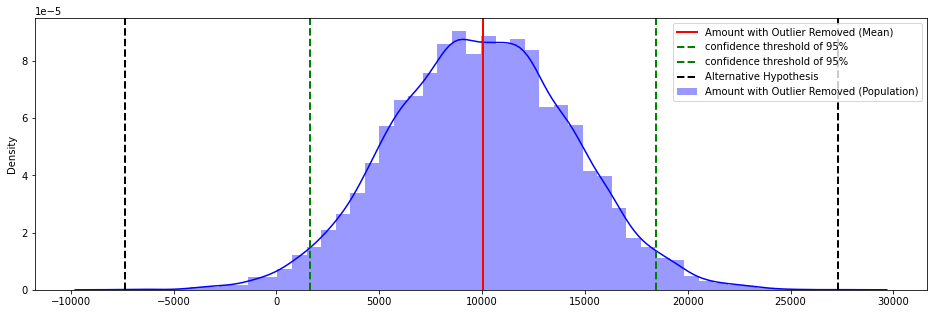

In [73]:
outlier_removed_pop = np.random.normal(site_interest_clean['load_weight'].mean(), site_interest_clean['load_weight'].std(), 10000)

ci = stats.norm.interval(0.95, site_interest_clean['load_weight'].mean(), site_interest_clean['load_weight'].std())

plt.figure(figsize=(16,5))
sns.distplot(outlier_removed_pop, label='Amount with Outlier Removed (Population)', color='blue')
plt.axvline(site_interest_clean['load_weight'].mean(), color='red', linewidth=2, label='Amount with Outlier Removed (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(outlier_removed_pop.mean() + stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(outlier_removed_pop.mean() - stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

`Berdasarkan hasil di atas, maka tidak benar apa bila pemerintah kota Austin menyebutkan tidak ada perbedaan rata-rata sampah antara data yang masih terdapat outlier pada site 'TDS - MRF' dengan yang tidak.`

## 9. Connecting Line

```
Berdasarkan hasil analisa yang dilakukan, maka dapat disimpulkan bahwa pemerintah kota Austin harus memperhatikan kapasitas penampungan yang terletak di TDS - MRF karena rata-rata sampah yang ada di TDS - MRF sangat banyak dibandingkan dengan tempat lain. Dan juga, permerintah kota Austin harus menambahkan kapasitas tempat pembuangan sampah di sekitar TDS - MRF karena terdapat jumlah sampah yang banyak dan tidak terduga dari yang dikira sebelumnya.
```

_____

# Summary
```
1. Statistik Deskriptif 
Statistik deskriptif itu berhubungan dengan deskripsi data. Maksudnya, data yang ada itu              menggambarkan suatu informasi. Misalnya, data seperti mean, modus, median, deviasi standar, dan variasi data lainnya yang dapat divisualisasi dalam bentuk grafik, sehingga menjadi lebih mudah untuk dipahami

Statistik Inferensial 
Statistik inferensial itu biasanya digunakan untuk menguji suatu hipotesis. Statistika Inferensial digunakan untuk pendugaan parameter, membuat hipotesis, dan menguji hipotesis tersebut hingga menjadi kesimpulan yang umum. Metode ini bisa juga disebut sebagai statistika induktif karena pengambilan kesimpulan dari Statistika Inferensial hanya didasarkan pada data sampel saja untuk menyimpulkan suatu data populasi.


2. Suatu distribusi dapat dikatakan normal jika: 
- Nilai frekuensi terbanyak terdapat di tengah, sedangkan nilai frekuensi terkecil (baik positif maupun negative) terdapat di ujung kiri dan kanan.
    
- Nilai mean, median, dan modus tidak terletak terlalu jauh.

Sehingga metrik yang dapat digunakan untuk menyimpulkan data terdistribusi normal atau tidak adalah mean, median, dan modus.


3. Pada kasus ini, saya menggunakan teknik `Tukey` dengan IQR untuk menghandle outlier. Hal ini disebabkan karena datanya tidak terdistribusi normal.


4. Konsep dari `Central Tendency` adalah bagaimana rata-rata distribusi suatu sample itu dapat dekat terahadap suatu distribusi populasi sehingga dapat menggambarkan nilai dari suatu populasi tersebut.


5. Jenis hipotesis yang saya gunakan pada kasus ini adalah `One Sample Two Tailed.` Hal ini karena pada kasus ini saya ingin membandingkan satu sample terhadap populasinya, yakni `load_weight` ketika tidak terdapat outlier dan ketika `load_weight` terdapat outlier.
```